# Extracting Barley Data

In [1]:
import pandas as pd
import os
from pathlib import Path
import json
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Reading data

In [2]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()

In [3]:
df = pd.read_csv(os.path.join(p_cwd, "data","phen_data_further_analysis.csv"), parse_dates = ['date'])

In [4]:
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0


In [5]:
df= df.rename({'day': 'day_year'}, axis=1)

In [6]:
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day_year,date,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0


In [7]:
df.drop(['alt_dem','gss_id', 'genus', 'date'], axis=1, inplace=True)
df

,s_id,lon,lat,alt,species,phase_id,year,day_year,cult_season
0,5144,11.23330,53.9833,5,Tilia platyphyllos,60,1951,2,0
1,2255,8.96667,51.3333,250,Corylus avellana,60,1951,5,0
2,1967,9.00000,49.6667,220,Corylus avellana,60,1951,6,0
3,4014,10.93330,49.8000,260,Corylus avellana,60,1951,7,0
4,512,10.13330,52.0167,120,Galanthus nivalis,60,1951,10,0
...,...,...,...,...,...,...,...,...,...
10793110,1876,7.43333,51.4000,120,Avena sativa,100,1963,244,1
10793111,1904,9.26667,50.7500,260,Prunus domestica,87,1963,244,0
10793112,1921,8.65000,49.6500,100,Colchicum autumnale,60,1963,244,0
10793113,1924,8.46667,49.6000,90,Colchicum autumnale,60,1963,244,0


In [8]:
#Extracting the barley observations 
df_barley = df[df['species']=='Hordeum vulgare']
df_barley

,s_id,lon,lat,alt,species,phase_id,year,day_year,cult_season
1092,3147,8.85000,49.2000,250,Hordeum vulgare,0,1951,44,1
2291,4329,9.80000,50.0667,240,Hordeum vulgare,0,1951,57,1
2481,3147,8.85000,49.2000,250,Hordeum vulgare,10,1951,60,1
2558,3090,8.70000,49.2500,140,Hordeum vulgare,0,1951,61,1
2578,3845,12.00000,49.5500,400,Hordeum vulgare,0,1951,61,1
...,...,...,...,...,...,...,...,...,...
10793000,6267,11.15000,50.5833,630,Hordeum vulgare,100,1963,243,1
10793017,202,10.05000,54.1667,35,Hordeum vulgare,100,1963,244,1
10793023,247,9.21667,54.3500,10,Hordeum vulgare,100,1963,244,1
10793070,1246,7.06667,51.2333,220,Hordeum vulgare,100,1963,244,2


In [9]:
df_barley.drop(['species'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df_barley['cult_season'].unique().tolist()

[1, 2]

In [10]:
#saving the barley data
df_barley.to_csv(os.path.join(p_cwd, "data", "barley_data", "barley_obs.csv"), index=False)

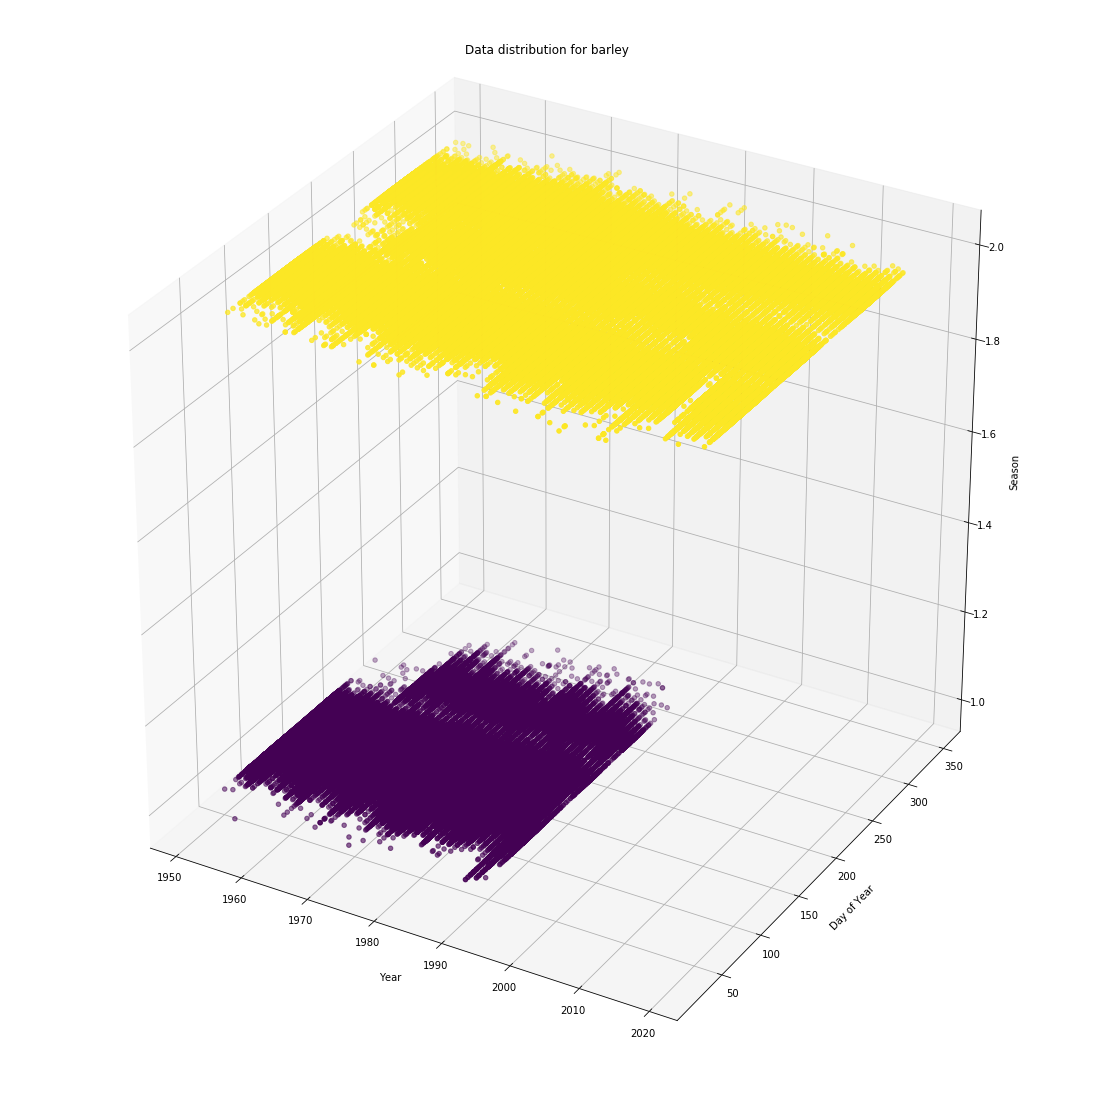

In [20]:
# 3D-Scatterplot


fig = plt.figure(figsize=(15,15))
ax=Axes3D(fig)


xs = df_barley['year']
ys = df_barley['day_year']
zs =df_barley['cult_season']
ax.scatter(xs, ys, zs, c=df_barley['cult_season'])
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Day of Year', labelpad=10)
ax.set_zlabel('Season', labelpad=10)

plt.title("Data distribution for barley", pad=40)
plt.show()

In [21]:
fig.savefig(os.path.join(p_cwd, "output","images","barley_plot.jpg"), dpi=300,
        orientation='portrait')

## Splitting summer and winter barley

In [22]:
df_barley.dtypes

s_id             int64
lon            float64
lat            float64
alt              int64
phase_id         int64
year             int64
day_year         int64
cult_season      int64
dtype: object

In [23]:
df_barley['cult_season'].unique() #there are both summer and winter barley

array([1, 2])

In [24]:
df_barley['alt'].tolist().count(-9999) # all the altitude data are available

0

In [25]:
stations_id_lst = df_barley['s_id'].unique().tolist() #German stations collecting barley data

In [26]:
length = len(stations_id_lst)
print(length)

6043


In [27]:
#remapping the barley stations id codes
keys = sorted(stations_id_lst)
values = [i for i in range (0, 6043, 1)]
stations_corresp_dict = dict(zip(keys,values))
with open(os.path.join(p_cwd, "output","printouts","stations_corresp_dict"), "w") as file:
    json.dump(stations_corresp_dict,file) 

In [28]:
df_barley=df_barley.replace({"s_id": stations_corresp_dict})

In [29]:
df_barley['s_id']=df_barley['s_id'].astype("category")

In [30]:
phases_id_lst = df_barley['phase_id'].unique().tolist()

In [31]:
len_phases = len(phases_id_lst)
len_phases

6

In [32]:
#remapping the codes for the phenological phases
p_keys = sorted(phases_id_lst)
p_values = [i for i in range (0, 6, 1)]
phases_corresp_dict = dict(zip(p_keys,p_values))
phases_corresp_dict

{0: 0, 10: 1, 31: 2, 51: 3, 85: 4, 100: 5}

In [33]:
df_barley=df_barley.replace({"phase_id": phases_corresp_dict})

In [34]:
df_barley['phase_id']=df_barley['phase_id'].astype("category")
df_barley

,s_id,lon,lat,alt,phase_id,year,day_year,cult_season
1092,2928,8.85000,49.2000,250,0,1951,44,1
2291,4022,9.80000,50.0667,240,0,1951,57,1
2481,2928,8.85000,49.2000,250,1,1951,60,1
2558,2875,8.70000,49.2500,140,0,1951,61,1
2578,3558,12.00000,49.5500,400,0,1951,61,1
...,...,...,...,...,...,...,...,...
10793000,5703,11.15000,50.5833,630,5,1963,243,1
10793017,185,10.05000,54.1667,35,5,1963,244,1
10793023,228,9.21667,54.3500,10,5,1963,244,1
10793070,1150,7.06667,51.2333,220,5,1963,244,2


In [35]:
a = pd.DataFrame(df_barley.groupby(by=['s_id','phase_id','cult_season','year']).size())

In [36]:
a[0].unique().tolist()
# for each station, phase_id, year there is only one data point, when the cult_season is considered

[0, 1]

In [37]:
#Splitting summer (season=2) and winter (season=1) barley
df_summerbarley = df_barley[df_barley['cult_season']==1] #summer crop sown in spring
df_winterbarley = df_barley[df_barley['cult_season']==2] #winter crop sown in autumn

In [38]:
df_summerbarley.drop(['cult_season'], axis=1, inplace=True)
df_winterbarley.drop(['cult_season'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
null_sb = df_summerbarley.isnull().sum() #no missing data
length_sb = len(df_summerbarley)
stations_sb = len(df_summerbarley['s_id'].unique().tolist())

print(null_sb)
print(length_sb)
print(stations_sb)

s_id        0
lon         0
lat         0
alt         0
phase_id    0
year        0
day_year    0
dtype: int64
316079
5613


In [40]:
null_wb = df_winterbarley.isnull().sum() #no missing data
length_wb = len(df_winterbarley)
stations_wb = len(df_winterbarley['s_id'].unique().tolist())

print(null_wb)
print(length_wb)
print(stations_wb)

s_id        0
lon         0
lat         0
alt         0
phase_id    0
year        0
day_year    0
dtype: int64
400731
5636


In [41]:
df_summerbarley.to_csv(os.path.join(p_cwd, "data","barley_data","summerbarley.csv"), index=0)
df_winterbarley.to_csv(os.path.join(p_cwd, "data","barley_data","winterbarley.csv"), index=0)